### Import modules

In [ ]:
import pandas as pd
import numpy as np
import recommenders as recommenders

###Load datasets 

In [ ]:
song_df1 = pd.read_csv('kaggle_visible_evaluation_triplets.txt' , sep='\t', names=['user_id','song_id','frequency'])
song_df1.head()

user_id             song_id  frequency
0  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOBONKR12A58A7A7E0        1.0
1  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOEGIYH12A6D4FC0E3        1.0
2  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOFLJQZ12A6D4FADA6        1.0
3  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOHTKMO12AB01843B0        1.0
4  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SODQZCY12A6D4F9D11        1.0

In [ ]:

song_df2 = pd.read_csv('unique_tracks.txt', sep = '<SEP>', names=['track_id','song_id','artist_name','release'], engine='python')
song_df2.head()

track_id             song_id       artist_name            release
0  TRMMMYQ128F932D901  SOQMMHC12AB0180CB8  Faster Pussy cat       Silent Night
1  TRMMMKD128F425225D  SOVFVAK12A8C1350D9  Karkkiautomaatti        Tanssi vaan
2  TRMMMRX128F93187D9  SOGTUKN12AB017F4F1    Hudson Mohawke  No One Could Ever
3  TRMMMCH128F425532C  SOBNYVR12A8C13558C       Yerba Brava      Si Vos Querés
4  TRMMMWA128F426B589  SOHSBXH12A8C13B0DF        Der Mystic   Tangle Of Aspens

In [ ]:
song_df = pd.merge(song_df1, song_df2.drop_duplicates(['song_id']),on='song_id', how='left')
song_df.head(10)

user_id  ...                                            release
0  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...                                     You're The One
1  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...  Horn Concerto No. 4 in E flat K495: II. Romanc...
2  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...                                           Tive Sim
3  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...  Catch You Baby (Steve Pitron & Max Sanna Radio...
4  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...                                        El Cuatrero
5  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...                      Unite (2009 Digital Remaster)
6  d7083f5e1d50c264277d624340edaaf3dc16095b  ...                                         Lift Me Up
7  d7083f5e1d50c264277d624340edaaf3dc16095b  ...                                    Living In A Lie
8  d7083f5e1d50c264277d624340edaaf3dc16095b  ...                                     Open Your Eyes
9  d7083f5e1d50c264277d624340edaaf3dc16095b  ...                                          Kurtizana

[10 rows x 6 columns]

In [ ]:
len(song_df)

1436096

In [ ]:
print(len(song_df1),len(song_df2))

1436096 1000000


### **Data Cleaning**

In [ ]:
song_df.isnull().any()

user_id        False
song_id         True
frequency       True
track_id        True
artist_name     True
release         True
dtype: bool

### **Outlier Detection and removal**

In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(song_df['frequency'])

Outliers: [54.0, 38.0, 31.0, 43.0, 62.0, 26.0, 42.0, 25.0, 37.0, 29.0, 25.0, 89.0, 26.0, 79.0, 59.0, 31.0, 27.0, 33.0, 36.0, 28.0, 27.0, 65.0, 26.0, 43.0, 33.0, 25.0, 53.0, 29.0, 30.0, 25.0, 53.0, 73.0, 25.0, 70.0, 33.0, 31.0, 26.0, 40.0, 26.0, 26.0, 25.0, 25.0, 25.0, 29.0, 46.0, 125.0, 40.0, 48.0, 27.0, 38.0, 150.0, 30.0, 33.0, 33.0, 34.0, 241.0, 33.0, 214.0, 30.0, 32.0, 75.0, 72.0, 33.0, 27.0, 25.0, 76.0, 57.0, 34.0, 65.0, 52.0, 33.0, 26.0, 55.0, 63.0, 29.0, 79.0, 25.0, 32.0, 29.0, 25.0, 43.0, 58.0, 82.0, 37.0, 49.0, 35.0, 39.0, 27.0, 37.0, 35.0, 39.0, 28.0, 42.0, 31.0, 38.0, 27.0, 35.0, 25.0, 27.0, 28.0, 37.0, 48.0, 26.0, 31.0, 25.0, 43.0, 37.0, 28.0, 33.0, 29.0, 56.0, 46.0, 50.0, 63.0, 25.0, 25.0, 40.0, 126.0, 42.0, 86.0, 52.0, 71.0, 47.0, 30.0, 36.0, 113.0, 39.0, 25.0, 30.0, 27.0, 32.0, 37.0, 42.0, 40.0, 40.0, 43.0, 37.0, 25.0, 25.0, 26.0, 25.0, 27.0, 32.0, 25.0, 28.0, 60.0, 28.0, 25.0, 27.0, 30.0, 118.0, 25.0, 61.0, 27.0, 36.0, 57.0, 29.0, 31.0, 30.0, 37.0, 52.0, 40.0, 89.0, 32.0

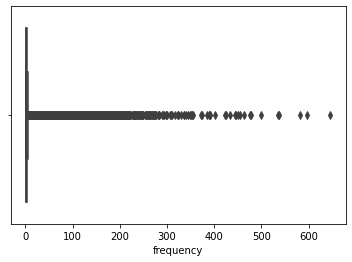

In [ ]:
import seaborn as sns
sns.boxplot(x=song_df['frequency'])


###Data Preprocessing

**Cumulative sum of listen count of the songs**

In [ ]:
song_group = song_df.groupby(['release']).agg({'frequency':'count'}).reset_index()
song_group.head()

release  frequency
0                             
Ef Ég Hefði Aldrei...          1
1                                
Light Mass Prayers          4
2  
The Arsonist Story":  Evil Craves Attention/O...          1
3                                 
Ég Átti Gráa Æsku          4
4                                (Jack The Stripper)          2

**Percentage of each song listened**

In [ ]:
sum_group = song_group['frequency'].sum()
song_group['percentage'] = (song_group['frequency'] / sum_group) * 100
song_group.sort_values(['frequency','release'], ascending=[0,1])

release  frequency  percentage
98442                    Sehr kosmisch       4998    0.348027
124934                            Undo       4441    0.309242
135569                  You're The One       4227    0.294340
28597   Dog Days Are Over (Radio Edit)       3744    0.260707
93630                          Revelry       3628    0.252630
...                                ...        ...         ...
137101                   Último Desejo          1    0.000070
137103              Über Grenzen Geh'n          1    0.000070
137105               Übers Geld (Skit)          1    0.000070
137107                 Üdvözöl A Pokol          1    0.000070
137114      þetta Gerist á Bestu Bæjum          1    0.000070

[137115 rows x 3 columns]

###Popularity Based Recommendation System

In [ ]:
popular = recommenders.popularity_recommender_py()

In [ ]:
popular.create(song_df, 'user_id', 'release')

In [ ]:
popular.recommend(song_df['user_id'][5])

user_id  ...  Rank
98442   fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...   1.0
124934  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...   2.0
135569  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...   3.0
28597   fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...   4.0
93630   fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...   5.0
98215   fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...   6.0
48885   fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...   7.0
47509   fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...   8.0
37509   fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...   9.0
120909  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  ...  10.0

[10 rows x 4 columns]

In [ ]:
popular.recommend(song_df['user_id'][10])

user_id  ...  Rank
98442   d7083f5e1d50c264277d624340edaaf3dc16095b  ...   1.0
124934  d7083f5e1d50c264277d624340edaaf3dc16095b  ...   2.0
135569  d7083f5e1d50c264277d624340edaaf3dc16095b  ...   3.0
28597   d7083f5e1d50c264277d624340edaaf3dc16095b  ...   4.0
93630   d7083f5e1d50c264277d624340edaaf3dc16095b  ...   5.0
98215   d7083f5e1d50c264277d624340edaaf3dc16095b  ...   6.0
48885   d7083f5e1d50c264277d624340edaaf3dc16095b  ...   7.0
47509   d7083f5e1d50c264277d624340edaaf3dc16095b  ...   8.0
37509   d7083f5e1d50c264277d624340edaaf3dc16095b  ...   9.0
120909  d7083f5e1d50c264277d624340edaaf3dc16095b  ...  10.0

[10 rows x 4 columns]

###Item - Item Similarity Recommendations

In [ ]:
item = recommenders.item_similarity_recommender_py()
item.create(song_df, 'user_id', 'release')

In [ ]:
user_items_past = item.get_user_items(song_df['user_id'][100])

In [ ]:
for i in user_items_past:
  print(i)

Ballad Of Big Nothing
My Paper Heart
We're All Gonna Die (featuring Iggy Pop)
Saint Is A Sinner (featuring Rocco DeLuca)
I Hold On (featuring Kid Rock)
Alphabet Town
Nothing To Say (featuring M. Shadows)
Gotten (featuring Adam Levine)
The Golden Rose (Album Version)
Genius


In [ ]:
item.recommend(song_df['user_id'][5])

No. of unique songs for the user: 6
no. of unique songs in the training set: 137116


KeyboardInterrupt: ignored

**Related songs based on the words**

In [ ]:
item.get_similar_items(['Again Again'])

no. of unique songs in the training set: 11811
Non zero values in cooccurence_matrix :42


user_id                              song     score rank
0                                 La Puerta  0.066667    1
1                        Anybody Listening?  0.066667    2
2          Weil Ich Dich Liebe (Remastered)  0.066667    3
3                         Sexy (Remastered)  0.066667    4
4                                     Juicy  0.066667    5
5                           Im happy anyway  0.062500    6
6                               Toy Soldier  0.058824    7
7                           Menjél Messzebb  0.058824    8
8                    A Mi Dios Todo Le Debo  0.055556    9
9                                   Na zore  0.055556   10